# IMAGE AUGMENTATION

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import scipy

In [3]:
train_datagen=ImageDataGenerator(rescale=1./255, zoom_range=0.2,horizontal_flip=True,vertical_flip=False)

In [4]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [5]:
x_train=train_datagen.flow_from_directory(r"C:\Users\Admin\PYTHON\flowers",target_size=(64,64),class_mode='categorical',batch_size=24)

Found 4317 images belonging to 5 classes.


In [6]:
x_test=test_datagen.flow_from_directory(r"C:\Users\Admin\PYTHON\flowers",target_size=(64,64),class_mode='categorical',batch_size=24)

Found 4317 images belonging to 5 classes.


In [7]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

# INITIALIZING CNN AND CREATE MODEL

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten

# ADD LAYERS

In [9]:
model=Sequential()

# INPUT LAYERS (CONVOLUTION ,MAXPOOLING,FLATTEN)

In [10]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))

In [11]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [12]:
model.add(Flatten())

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


# HIDDEN LAYERS

In [14]:
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))

# OUTPUT LAYERS

In [15]:
model.add(Dense(5,activation='softmax'))

In [16]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [17]:
len(x_train)

180

# TRAIN THE MODEL

In [18]:
model.fit_generator(x_train,steps_per_epoch=len(x_train), validation_data=x_test, validation_steps=len(x_test), epochs= 30)

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/30
180/180 [==============================] - 90s 498ms/step - loss: 1.3223 - accuracy: 0.4790 - val_loss: 1.1087 - val_accuracy: 0.5712
Epoch 2/30
180/180 [==============================] - 45s 252ms/step - loss: 1.0223 - accuracy: 0.5983 - val_loss: 1.0673 - val_accuracy: 0.5967
Epoch 3/30
180/180 [==============================] - 47s 260ms/step - loss: 0.9362 - accuracy: 0.6356 - val_loss: 1.0128 - val_accuracy: 0.6044
Epoch 4/30
180/180 [==============================] - 47s 262ms/step - loss: 0.8771 - accuracy: 0.6593 - val_loss: 0.8344 - val_accuracy: 0.7014
Epoch 5/30
180/180 [==============================] - 47s 262ms/step - loss: 0.8186 - accuracy: 0.6919 - val_loss: 0.7578 - val_accuracy: 0.7128
Epoch 6/30
180/180 [==============================] - 47s 263ms/step - loss: 0.7751 - accuracy: 0.7065 - val_loss: 0.6888 - val_accuracy: 0.7470
Epoch 7/30
180/180 [==============================] - 47s 263ms/step - loss: 0.6985 - accuracy: 0.7327 - val_loss: 0.7022 - val_ac

# SAVE THE MODEL

In [19]:
model.save('Flowers_classification_model1.h5')

# TEST THE MODEL

In [20]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [21]:
# Load the model
model=load_model('Flowers_classification_model1.h5')

In [22]:
img=image.load_img(r"C:\Users\Admin\PYTHON\sunflower.jpeg",target_size=(64,64))

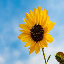

In [23]:
img

In [24]:
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
# x_train.class_indices
index=['daisy','dandelion','rose','sunflower','tulip']
index[y[0]]

1/1 [==============================] - 0s 287ms/step


'sunflower'